#  Лабораторная работа №2 
#### Выполнил: Прокопенко А.С. РК6-61Б


Имеем математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия:  
$$  
{{d} \over {dt}} {\left [ \binom{x}{y} \right ] } = {\left [  \binom{ ax - bxy}{cxy - dy } \right ] } 
$$  (1)

Приравняв правую часть к нулю, получим стационарные точки:  
1. \\( (0,0) \\)  
1. \\( ( {{d} \over {c}}, {{a} \over {b}}) \\)  
  
Вторая точка - это точка устойчивого равновесия системы. Цель работы - получить оптимальные значения параметров модели (a, b, c, d), с помощью которых можно ее вычислить.

Зададим начальные коеффициенты:  
`a = 3`; `b = 2`; `s = 3`; `g = 2`

Для отрисовки полученных результатов воспользуемся предоставленным классом `Biome`:

In [83]:
import numpy as np
import matplotlib.pyplot as plt


class Biome:

    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
        self.__dt = dt
        self.__n_iters = int(tmax / dt)
        # Intial state
        self.pred_init = pred_init
        self.prey_init = prey_init
        # Data arrays
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, delta, gamma):
        """
        Simulation settings:
            alpha - prey growth
            beta - prey mortality
            delta - predator growrh
            gamma - predator mortality
        """
        self.time = np.zeros(self.__n_iters)
        self.prey = np.zeros(self.__n_iters)
        self.pred = np.zeros(self.__n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        # Lotka-Volterra equations
        for i in range(self.__n_iters - 1):
            self.prey[i + 1] = self.prey[i] + self.__dt * self.prey[i] * (alpha - self.pred[i] * beta)
            self.pred[i + 1] = self.pred[i] + self.__dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self.__dt] * (self.__n_iters - 1))
        return self.time, self.prey, self.pred

    def plot(self):
        plt.xlabel('time')
        plt.ylabel('n')
        plt.plot(self.time, self.pred, label='predators', color='r')
        plt.plot(self.time, self.prey, label='preys', color='b')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_cycle(self):
        plt.xlabel('n predators')
        plt.ylabel('n preys')
        plt.plot(self.pred, self.prey, color='black')
        plt.grid()
        plt.show()
    
    def get_n(self):
        return self.__n_iters

## Выбор критериев оптимизации  

Были взяты два критрия для поиска оптимальных значений параметров, при которых разность между количеством и числом жертв минимальная
1.  \\( \sqrt { \sum_{i=1}^{n}{(x_{i} - y_{i})^2}} \rightarrow min \\)  
1.  \\( \sum_{i=1}^{n}{ \mid {x_{i} - y_{i}}} \mid \rightarrow min \\)  

In [84]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


# criterion 1
def criterion1(args):
    biome = Biome(tmax=10)
    biome.run(args[0],args[1],args[2],args[3])
    s = 0
    for i in range(biome.get_n()):
        s += abs(biome.prey[i] - biome.pred[i])
    return math.sqrt(s)

# criterion 2
def criterion2(args):
    biome = Biome(tmax=10)
    biome.run(args[0],args[1],args[2],args[3])
    s = 0
    for i in range(biome.get_n()):
        s += (biome.prey[i] - biome.pred[i]) ** 2
    return math.sqrt(s)

def minimize_and_plot(func, a, b, c, d):
    res = minimize(func,(a,b,c,d), method='BFGS')
    biome = Biome(tmax=10)
    biome.run(res.x[0],res.x[1],res.x[2],res.x[3])
    biome.plot()
    biome.plot_cycle()
    return res.x

### Построение графиков  
На рисунках представлены результаты моделирования  

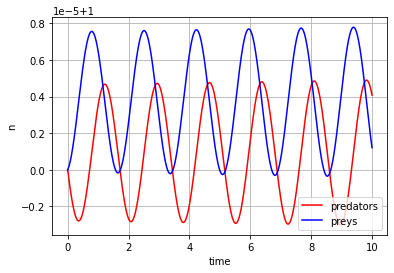

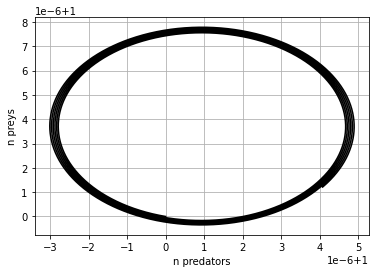

In [85]:
coef1 = minimize_and_plot(criterion1, 3,2,3,2)

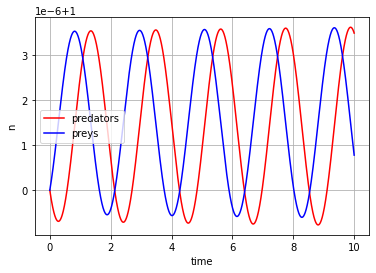

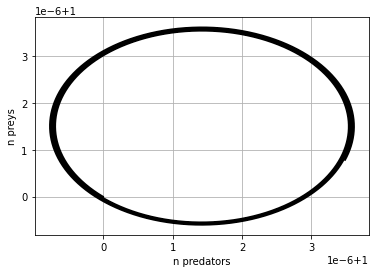

In [86]:
coef2 = minimize_and_plot(criterion2, 3,2,3,2)

## Вывод  

Оба критерия дают одну и ту же стационарную точку модели Лотки-Вольтерра (приблизительно 1, 1):

In [87]:
print('d/c = %lf\na/b = %lf' % (coef1[3] / coef1[2], coef1[0] / coef1[1]))

d/c = 1.000004
a/b = 1.000001


In [88]:
print('d/c = %lf\na/b = %lf' % (coef2[3] / coef2[2], coef2[0] / coef2[1]))

d/c = 1.000001
a/b = 1.000001
